In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Import the dataset

In [39]:
from sklearn import datasets

wine = datasets.load_wine()


In [40]:
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [41]:
# print the names of the features
print(wine.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [42]:
# print the label
print(wine.target_names)

['class_0' 'class_1' 'class_2']


In [43]:
print(wine.data.shape)

(178, 13)


In [44]:
# print the wine labels (0:Class_0, 1:Class_1, 2:Class_3)
print(wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [45]:
# print target(or label)shape
print(wine.target.shape)

(178,)


# Extracting features and labels

In [46]:
X = wine.data
y = wine.target

# Splitting the data

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Standardized the data

In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# Finding Optimal Value of K

In [49]:
Error_Rate = []

for i in range(1,50):

    knn_opt = KNeighborsClassifier(n_neighbors = i)
    knn_opt.fit(X_train_scaled,y_train)
    y_pred_opt = knn_opt.predict(X_test_scaled)
    Accuracy = np.mean(y_pred_opt == y_test)
    error_rate_value = 1 - Accuracy
    Error_Rate.append(error_rate_value)

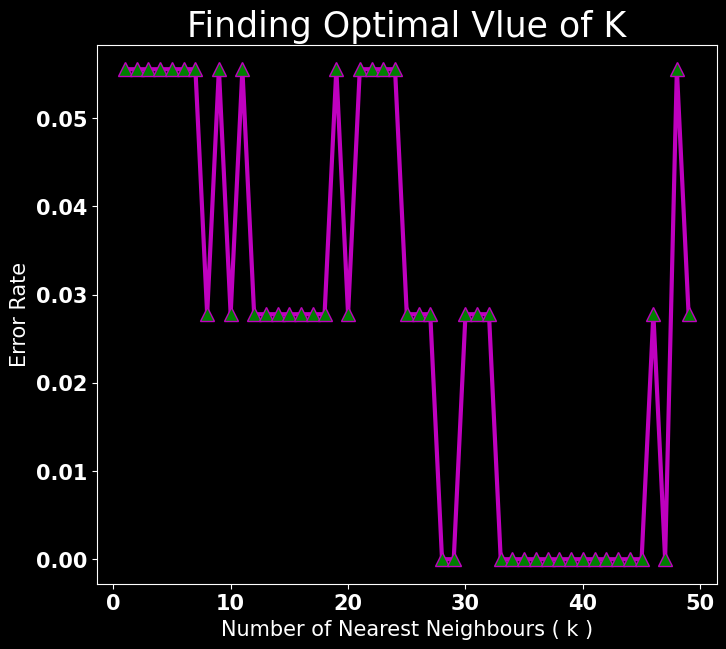

In [50]:
plt.figure(figsize=(8,7))
plt.plot(range(1, 50), Error_Rate, 'm', lw = 3,  marker ='^', markerfacecolor ='g', markersize = 10)
plt.title('Finding Optimal Vlue of K', fontsize = 25)
plt.xlabel('Number of Nearest Neighbours ( k )', fontsize = 15)
plt.ylabel('Error Rate', fontsize = 15)
plt.show()

# Applying KNN Classifier

In [51]:
knn = KNeighborsClassifier(n_neighbors = 28)


knn.fit(X_train_scaled, y_train)


y_pred = knn.predict(X_test_scaled)

In [52]:
Accuracy = np.mean(y_pred == y_test) * 100
print("Accuracy : %2.2f" % (Accuracy))

Accuracy : 100.00


In [53]:
font = {
    'weight' : 'bold',
    'size'   : 15}
plt.rc('font', **font)

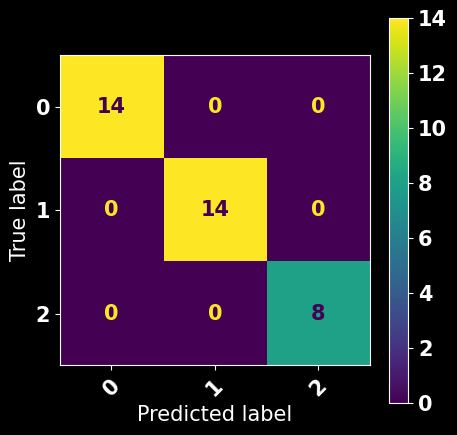

In [54]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= [0, 1, 2])
disp.plot(xticks_rotation=45)
fig = disp.ax_.get_figure()
fig.set_figwidth(5)
fig.set_figheight(5)
plt.show()